
## 추측통계

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# 모집단과 표본
# 표본에서 통계량을 뽑아서 모수를 추정함 -> 모집단을 설명할 수 있음
# 표본 추출 방법
    # 대통령 지지도
    # 표본을 잘 뽑아야 함 -> 왜곡, 의미 없음, 거짓말 하는 것

# df = pd.read_csv('drive/Othercomputers/내 컴퓨터/hmkd1/m3_통계수학/data/ch4_scores400.csv')   # colab용   
df = pd.read_csv('../data/ch4_scores400.csv')
print(df.shape)
scores = np.array(df.score)
scores[:10]

(400, 1)


array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [ ]:
# 1차원 배열, 시리즈나 리스트를 입력으로 받음

df_s = df.score
df_a = np.array(df.score)
df_l1 = df_a.tolist()
df_l2 = df.score.tolist()    # .values를 사용하여 해당 열의 값을 리스트로 만듬(ex> df.name.tolist())

print(type(df_s), type(df_a), type(df_l1), type(df_l2))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'list'> <class 'list'>


In [ ]:
np.random.choice([1,2,3,],3, replace=False)    #replace하면 중복 방지, replace=True가 default

array([1, 3, 2])

In [ ]:
# p매개변수 - choice에 선택될 확률의 가중치(weights)를 줄 수 있음

data = np.array([1,2,3,4,5])
p = [0.1, 0.2, 0.4, 0.2, 0.1]
sample = np.random.choice(data,size=10, p=p)
print(sample)

[4 3 5 3 3 3 2 2 1 3]


In [ ]:
# choice를 사용하여 표본을 뽑음
# 표본의 값이 계속 변하면 안되니까 seed를 사용해줌

np.random.seed(0)
sample = np.random.choice(scores, 20)
# sample = np.random.choice(df.score, 20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [ ]:
# 표본집단의 평균

sample.mean()

70.4

In [ ]:
# 모집단의 평균

scores.mean()
df.score.mean()

69.53

In [ ]:
# sample 여러개 뽑아서

for i in range(5):
    sample = np.random.choice(scores,20)
    print(sample)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean(),'\n')

[56 55 79 91 86 79 83 55 85 76 81 57 77 99 61 57 81 73 59 59]
1번째 무작위 추출로 얻은 표본평균 72.45 

[80 50 85 86 85 59 72 58 31 60 56 64 49 88 66 63 63 47 67 45]
2번째 무작위 추출로 얻은 표본평균 63.7 

[31 55 77 61 54 57 72 46 52 76 92 63 63 80 94 70 76 61 80 61]
3번째 무작위 추출로 얻은 표본평균 66.05 

[47 60 65 86 65 74 76 60 85 78 73 70 68 86 58 74 67 67 83 92]
4번째 무작위 추출로 얻은 표본평균 71.7 

[54 73 92 81 87 56 96 57 93 67 90 54 90 75 46 80 63 57 78 94]
5번째 무작위 추출로 얻은 표본평균 74.15 




#### 데이터 종류
- 연속형 데이터 : 일정한 구간에서 무한히 많은 가능한 값을 가질 수 있는 데이터
- 이산형 데이터

#### <br><br>확률


#### <br><br>확률변수- 어떤 확률분포에 따라 값을 가질 수 있는 변수, 확률분포에 의해 정의됨, 확률분포를 통해 그 값을 예측하거나 분석하는데 사용됨
- 이산확률 변수(Discrete Probability Variable)
    - 불연속적인 확률분포를 따름 (주사위, 동전 던지기)
- 연속확률 변수(Continuous Probability Variable)
    - 연속적인 값들을 가질 수 있는 변수, 연속확률분포를 따름 (시간, 길이, 무게)

#### <br><br>확률분포 - 확률변수가 가질 수 있는 값들과 그 값들이 나타날 확률을 나타내는 함수 또는 그래프
- 이 2개(확률변수와 확률)를 나타낸 것인 확률분포임 (x=확률변수, y=확률)
- 확률변수에 대한 확률
    - 이산확률분포
        - 막대그래프
        - 파이차트
        - CDF
        - 점그래프
        - 선그래프
        - 
    - 연속확률분포
        - 막대그래프
        - 파이차트
        - CDF
        - PDF
        - 선그래프
        - KDE(Kernel Density Estimation) : 연속확률분포에 대해 확률밀도함수를 추정하는데 사용됨, 연속적인 데이터에 대한 추정을 위해 사용됨

#### <br><br>stats의 확률분포객체들
- 이산확률분포 (CDF, PPF, Quantile function)
    - binom
    - poisson
    - geom
    - hypergeom
    - multinomial
    - nbinom
- 연속확률분포 (PDF, CDF, PPF, Quantile function)
    - norm
    - t
    - uniform
    - expon
    - gamma
    - beta

#### <br><br>확률분포객체의 메서드들
- PDF확률밀도함수
    - 어떤 확률 변수의 특정 값 주변에서 그 값이 나타날 확률
- CDF누적분포함수
    - 확률 변수가 특정 값보다 작거나 같을 확률을 나타내는 함수
    - 확률의 누적 분포를 나타냄
- PPF(Percent Point Functiomn = Quantile function 누적분포함수의 역함수
- mean() var() std() median() mode() moment()

#### <br><br>(표준)정규분포, 표준화
- 일반화 모델을 만들려는게 우리 목적 -> 일반적인 모든 데이터에 잘 작동하게(일반화) -> 그러기 위해 데이터를 정규화시켜 줘야 함
- age의 값이 외쪽으로 쏠려 있을 때 -> 정규화를 시켜 줘야 알고리즘 학습에 좋음
    - 범주화하던지, 로그함수써서 정규화 시켜준다
    
#### <br><br>스케일링
- 데이터의 값을 
- 스케일을 조정하는 두 가지 방식
    - 정규화
        - 각각의 사건이 발생할 확률을 합이 1이 되도록 배분하여 표현하는 것이 일반적입니다. 이를 확률의 정규화(normalization)라고 합니다.
    - 표준화
        - 아

#### 로그함수
- 숫자를 작게 만든다
- 1000과 100과 10의 데이터 차이 큼, 또는 데이터가 왼쪽, 오른쪽으로 쏠려 있음
    - 1000을 10으로 나누면 3 -> 이런 식으로 3, 2, 1로 만들면 격차가 줄어듦


확률분포가 정규분포의 모습을 그린다는 의미는 평균일 때가 가장 확률이 높다는 것임

모수추정에 있어 중요한 것이 모집단의 분포가 중요함 -> 표본도 모집단의 분포를 따르느냐

 

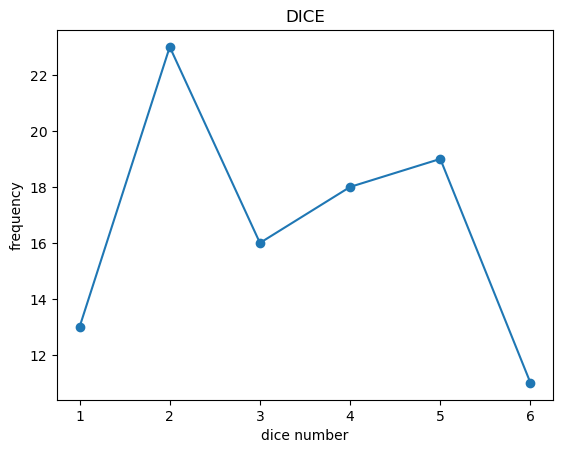

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

# 주사위 던지기 결과 데이터
dice_results = np.random.randint(1, 7, size=100)

# 빈도 계산
unique_values, value_counts = np.unique(dice_results, return_counts=True)

# 선 그래프 그리기
plt.plot(unique_values, value_counts, marker='o')
plt.xlabel('dice number')
plt.ylabel('frequency')
plt.title('DICE')
plt.show()

In [ ]:
# 주사위가 찌그러져있음 - 6이 될 확률이 높음
# 정규화하기 위하여 21을 분모로 잡음
# 분모를 조정하여 총합이 1이 되도록 하는 것이 정규화(Normalization)라고 부릅니다.

dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]    # = [4.76%, 9.52%, 14.29%, 19.05%, 23.81%, 28.57%]

np.random.seed(1)
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)    # p : 이 확률을 참고하여 초이스함
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [ ]:
# histogram

freq,_ = np.histogram(sample,bins=6,range=(1,7))
print(freq,'\n')
rdf = pd.DataFrame({'frequency':freq, 'relative frequency':freq/num_trial},
                  index=pd.Index(np.arange(1,7),name='dice'))
rdf

[ 6 12 12 20 24 26] 



,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


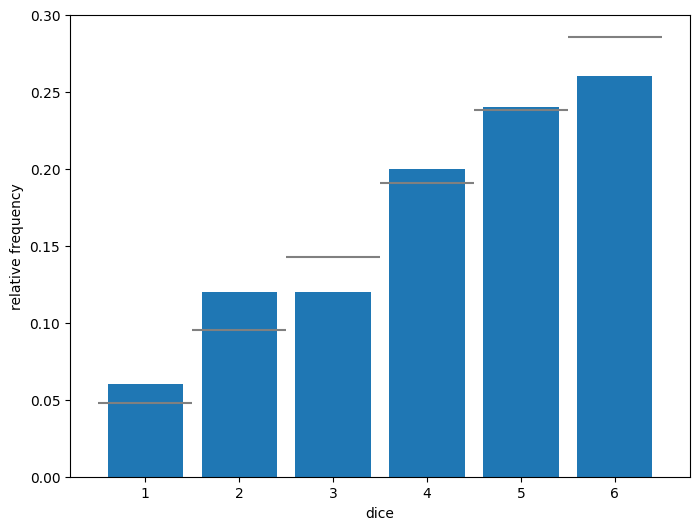

In [ ]:
# 100번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포와 실제 확률분포 사이에는 차이 발생
# 의도한 롹률과는 조금 다르게 나온 것을 확인할 수 있음

# linspace 함수를 사용하여 1.5에서 6.5 사이를 6개의 동일한 간격으로 나눈 값을 반환하는 것을 의미합니다.
# density - 밀도, 히스토그램의 높이를 상대 빈도로 정규화하여 표시함
# rwidth - 기본값은 1, 히스토그램 막대의 폭이 데이터의 구간 폭과 동일하게 그려짐

# = [4.76%, 9.52%, 14.29%, 19.05%, 23.81%, 28.57%]

np.random.seed(1)
num_trial=100
sample = np.random.choice(dice, num_trial, p=prob) 

plt.figure(figsize=(8,6))
plt.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
plt.hlines(prob,np.arange(1,7), np.arange(2,8), color='gray')    # 1과2 2와3 이런 식으로 라인 그림
plt.xticks(np.linspace(1.5,6.5,6), np.arange(1,7))    # x, x_labels (x는 눈금, x_labels은 이름)
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

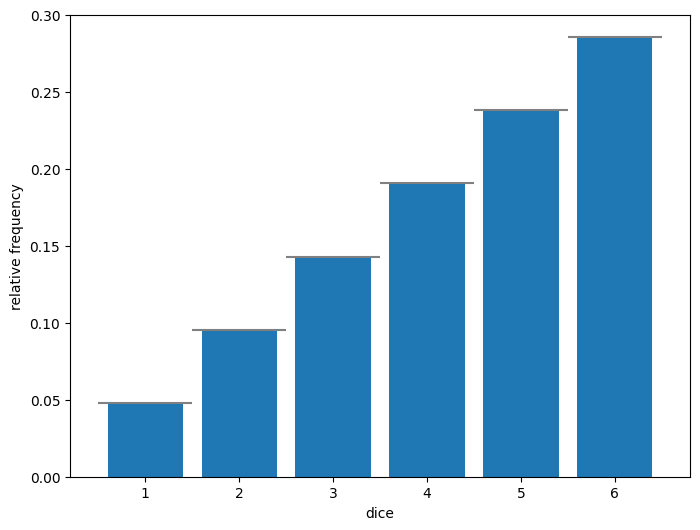

In [ ]:
# 1000000번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포는 실제 확률분포로 근접
# 시행 횟수를 늘리면 상대도수는 확률분포로 수렴

np.random.seed(1)
num_trial=1000000
sample = np.random.choice(dice, num_trial, p=prob) 

plt.figure(figsize=(8,6))
plt.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
plt.hlines(prob,np.arange(1,7), np.arange(2,8), color='gray')    # 1과2 2와3 이런 식으로 라인 그림
plt.xticks(np.linspace(1.5,6.5,6), np.arange(1,7))    # x, x_labels (x는 눈금, x_labels은 이름)
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

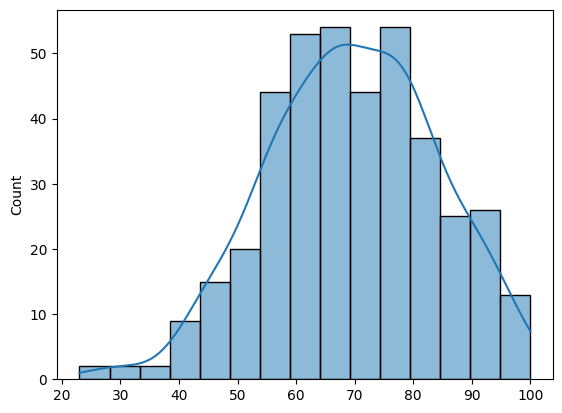

In [ ]:
# 모집단
# df.shape - 행과 열의 갯수를 튜플 형태로 반환함

df = pd.read_csv('drive/Othercomputers/내 컴퓨터/hmkd1/m3_통계수학/data/ch4_scores400.csv')   # colab용   
# df = pd.read_csv('../data/ch4_scores400.csv')
df.shape
scores = np.array(df.score)

sns.histplot(scores, kde=True)
plt.show()

In [ ]:
scores.shape
df.score.describe()

count    400.000000
mean      69.530000
std       14.393994
min       23.000000
25%       60.000000
50%       69.000000
75%       80.000000
max      100.000000
Name: score, dtype: float64

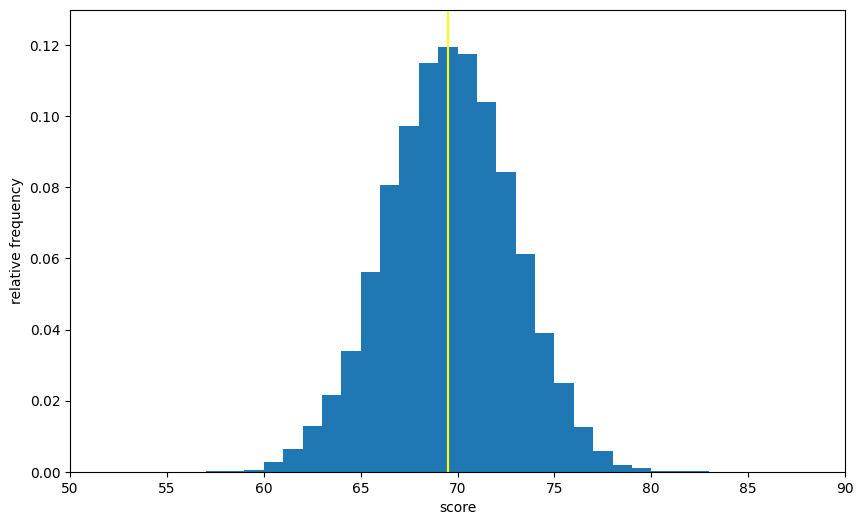

In [ ]:
# 표본평균은 모평균을 중심으로 분포하는 것을 확인
# 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 된다.

sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]
len(sample_means)

fig = plt.figure(figsize=(10,6))
plt.hist(sample_means, bins=100, range=(0,100), density=True)

# 모평균을 세로선으로 표시
plt.vlines(np.mean(scores), 0,1,'yellow')
plt.axis([50,90,0,0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.show()

확률론은 불확실성이 존재하는 상황에서 결과의 가능성을 수학적으로 모델링하는 분야입니다. 이를 위해 몇 가지 중요한 개념이 필요합니다. 이 중요한 개념들은 다음과 같습니다:

- 실험과 표본 공간: 확률론에서는 특정한 조건에서 일어나는 사건을 실험이라고 하며, 실험에서 가능한 모든 결과의 집합을 표본 공간이라고 합니다.

- 사건과 확률: 사건은 표본 공간의 부분집합으로, 일어날 가능성이 있는 결과의 집합을 의미합니다. 확률은 특정한 사건이 일어날 가능성을 나타내는 값으로, 0과 1 사이의 값입니다.

- 조건부 확률: 조건부 확률은 특정한 사건이 일어났을 때, 다른 사건이 일어날 확률을 의미합니다. 조건부 확률은 주어진 사건이 일어난 경우에만 적용되며, 이전 확률과는 다른 개념입니다.
    - 손흥민 선수가 주전으로 뛸 확률 * 골을 넣을 확률 (0.75 * 0.3 = 0.225)

- 독립성: 두 사건이 독립적이라는 것은, 하나의 사건이 일어나는 것이 다른 사건의 발생 가능성에 영향을 미치지 않는다는 것을 의미합니다. 이러한 경우, 두 사건의 결합 확률은 두 확률의 곱과 같습니다.

- 확률분포: 확률분포는 가능한 모든 결과에 대해 각각의 결과가 일어날 확률을 나타내는 함수입니다. 대표적인 예로 이항분포, 정규분포 등이 있습니다.

- 기대값: 기대값은 확률분포와 관련되어, 각 결과의 확률과 그 결과의 가치를 곱한 값을 모두 더한 것입니다. 즉, 평균값과 유사한 개념입니다.

확률의 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다.

- 빈도주의 관점에서는 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 정의합니다. 즉, 많은 반복을 통해 어떤 사건이 발생하는 비율을 계산하는 것입니다. 이 관점에서는 데이터가 수집될 때마다 확률값이 달라지지 않는다고 가정하며, 샘플 크기가 커질수록 이론적인 확률 값과 가까워진다고 봅니다.

- 반면에 베이지안 관점에서는 확률을 "사건이 일어날 가능성"으로 정의합니다. 이 관점에서는 데이터를 수집하기 전에 이미 어떤 사전 지식이 있다는 가정하에 데이터를 수집하고, 그에 따라 사후 확률을 갱신합니다. 이는 사전 지식과 데이터를 통해 모델 파라미터의 확률 분포를 추정하고, 이를 통해 불확실성을 줄이는 것입니다.

- 이러한 차이 때문에 빈도주의 관점에서는 확률을 정확하게 계산하고자 반복 실험을 수행하며, 이론적인 확률값에 근접하도록 데이터 크기를 늘립니다. 반면에 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다.

- 결론적으로, 빈도주의 관점과 베이지안 관점은 확률을 이해하는 방법에서 차이가 있습니다. 빈도주의 관점은 확률을 실험에서 어떤 사건이 일어날 빈도로 이해하며, 베이지안 관점은 확률을 어떤 사건이 일어날 가능성으로 이해합니다. 이러한 차이로 인해 빈도주의와 베이지안 방법은 다양한 문제 해결에 사용됩니다. 예를 들어, 빈도주의 방법은 통계적 추론에 사용되며, 베이지안 방법은 패턴 인식, 머신러닝, 자연어 처리 분야 등에서 사용됩니다.
    - 오류를 최소화하기 위해서임, 신중한 방식

빈도주의 관점은 확률을 "반복되는 실험에서 어떤 사건이 일어날 빈도"로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 동전을 던져서 앞면이 나올 확률이 얼마나 되는지 알아보려고 한다고 가정해봅시다. 이 경우, 동전을 반복적으로 던져서 앞면이 나올 확률을 계산하는 것이 빈도주의 관점입니다.

- 100번의 실험을 수행해서 앞면이 60번 나왔다면, 앞면이 나올 확률은 0.6, 즉 60%입니다. 이처럼 빈도주의 관점에서는 반복적인 실험을 통해 얻은 데이터를 바탕으로 확률을 계산합니다.

- 이와 같은 방법으로, 빈도주의 관점은 대규모 데이터를 바탕으로 통계적 추론을 수행하는 분야에서 많이 사용됩니다. 예를 들어, 의학 연구에서는 수많은 환자 데이터를 바탕으로 질병 발생 확률을 계산하고, 이를 바탕으로 예방 방법을 제시합니다. 또한, 마케팅 연구에서는 대규모 데이터를 바탕으로 소비자의 구매 확률을 계산하고, 이를 바탕으로 마케팅 전략을 수립합니다.

- 즉, 빈도주의 관점에서는 반복적인 실험을 통해 데이터를 모으고, 이를 바탕으로 확률을 계산합니다. 이를 통해 대규모 데이터에서 일어날 가능성을 추정하고, 이를 바탕으로 데이터 분석 및 예측을 수행합니다.

베이지안 관점은 확률을 "사건이 일어날 가능성"으로 이해하는 것입니다. 이를 이해하기 위해서는 간단한 예시를 들어보겠습니다.

- 예를 들어, 암 환자 진단 문제를 생각해봅시다. 어떤 환자가 암에 걸렸을 때, 병원에서 검사를 통해 양성 판정이 나왔다고 가정해봅시다. 이 때, 베이지안 관점에서는 이 결과가 실제로 환자가 암에 걸렸음을 의미하는가에 대한 확률을 계산합니다.

- 베이지안 관점에서는 이 확률을 "사전 확률"이라고 부릅니다. 즉, 검사를 통해 양성 판정이 나오기 전에는 이 환자가 암에 걸렸을 확률을 이미 가정하고 있었다는 것입니다. 예를 들어, 이전의 암 환자들의 데이터를 분석하여, 이 환자가 암에 걸렸을 확률을 0.1, 즉 10%로 가정하였다고 합시다.

- 그리고, 이제 검사를 통해 양성 판정이 나왔다고 가정합니다. 이 때, 검사 결과가 양성일 때 암에 걸렸을 확률을 계산하는 것이 베이지안 관점입니다. 이를 "사후 확률"이라고 부르며, 사전 확률과 검사 결과를 고려하여 계산됩니다.

- 예를 들어, 이전의 암 환자들의 데이터에서 암에 걸린 환자 중 80%가 양성 판정을 받았다고 가정합니다. 이러한 정보를 바탕으로, 이 환자가 암에 걸렸을 사후 확률은 다음과 같이 계산됩니다.

사전 확률: 10%
우도(검사 결과가 양성일 확률): 80%
사후 확률: (10% x 80%) / (10% x 80% + 90% x 20%) = 30.8%

즉, 이 환자가 검사 결과가 양성인 경우에는 암에 걸렸을 확률이 30.8%입니다.

예를 들어, 여러분이 복권을 사서 당첨이 되었다고 가정해봅시다. 그리고 당첨된 복권의 확률을 계산하고자 합니다. 이 때, 베이지안 관점에서는 이 확률을 "사후 확률"로 계산합니다.

- 우선, 이 복권의 당첨 확률을 사전 지식으로 가정합니다. 예를 들어, 이 복권이 얼마나 팔렸는지, 이전의 당첨 데이터는 어떻게 되는지 등의 정보를 바탕으로, 사전 확률을 0.001, 즉 0.1%로 가정합니다.

- 그리고, 복권을 구매한 사람들 중에서 몇 명이 당첨되었는지 데이터를 수집합니다. 이를 바탕으로 우도, 즉 "당첨된 복권을 구매한 사람들의 비율"을 계산합니다.

- 예를 들어, 1,000,000 명이 복권을 구매하고, 그 중 1,000 명이 당첨되었다면, 우도는 0.001, 즉 0.1%입니다.
    - 우도 = 가능성임
- 그리고, 이 사전 확률과 우도를 결합하여 사후 확률을 계산합니다. 이를 통해, 이 복권을 구매했을 때 당첨될 확률을 추정할 수 있습니다.


이와 같이, 베이지안 관점에서는 사전 지식을 가정하고, 그에 따라 데이터를 수집하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다. 이를 통해 데이터의 불확실성을 고려하여 예측과 의사결정을 수행합니다.

#### 추측통계
확률을 사용하여 모집단의 통계적 성질 (=모수)을 추측하는 기법 -> 표본의 통계량이 모수를 추측할 수 있게 해줌

[모집단 분포와 표본분포]  

- 모집단: 어떤 통계적 실험의 대상이 되는 모든 대상물. ex. 대한민국 모든 남성의 키 데이터, 2018 수능점수 데이터
- 모집단 분포: 모집단은 데이터 집단이므로 어떠한 분포를 이루며 이 데이터가 이루는 확률 분포가 모집단 분포
- 모수: 모집단의 특성을 나타내는 수치로 모평균,모분산,모표준편차,모비율,모상관관계 등  
  수능점수 전체데이터를 알고 싶은 것이 아니라 전체 수능점수 평균, 표준편차를 알고 싶어한다.
  수능점수와 달리 일반적으로 대부분의 모집단 분포는 완전하게 알려진 것이 없으며 전수조사는 경제적, 공간적, 시간적 제약으로 인해 거의 불가능
- 표본: 모집단의 모수(특성)을 알기 위하여 표본을 추출해서 모집단의 모수를 추정
- 확률표본:  모집단을 구성하는 모든 구성원이 표본으로 뽑힐 확률을 동일하게 하여 추출한 표본. Random이란 무작위라는 의미로, 어떠한 의도를 가지지 않는다는 것을 의미하며, 모든 구성원이 뽑힐 확률이 동일하다는 개념. 
- 통계량: 확률표본의 특성을 설명하는 값으로 표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계 등  
  모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않으나 통계량은 표본을 어떻게 추출하느냐에 따라서 그 값이 다르게 나타난다.
- 확률변수: 무작위 실험을 했을 때 특정 확률로 발생하는 각각의 결과를 수치값으로 표현한 변수. 동전의 앞과 뒤
- 확률분포: 확률변수 X의 모든 값과 그 에 대응하는 확률값들의 분포. 동전의 앞 0.5, 뒤 0.5 
- 무작위로 표본 30개씩 반복해서 100번 추출하면 100번 추출한 표본 30개의 평균값들을 100개 구할 수 있다. 추출된 표본들의 각 평균값들에 대한 발생 분포를 그려보면 특정 확률변수에 대응하는 확률을 가진 확률 분포를 그릴 수 있다. 이것을 통계량의 확률분포라고 할 수 있고 이를 표본분포라고 부른다. 
- 통계량이 확률 변수라는 의미: 확률변수의 확률분포가 수학적으로 설명가능한 분포(예, 정규분포)를 따른다고 하면 특정 확률변수와 확률함수를 알고 있다면 특정 사건이 일어날 확률을 계산할 수 있으며 더 나아가 모수와 통계량의 관계를 알고 있다면 그것을 통해 모수에 대한 통계적인 추정을 할 수 있다. 즉 통계량의 확률 함수 또는 표본 분포를 안다고 가정하면 이를 이용해 모수를 추정할 수 있다. 

[표본통계량 성질]

- 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.
- 샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐. 샘플사이즈를 크게 하면 흩어짐이 적은 신뢰할 수 있는 표본평균을 얻을 수 있다.
- 표준오차는이론상 표본평균의 표준편차 크기인데 샘플사이즈가 커지면 표준오차는 작아짐
- 모분산은 0.64, 표본분산의 평균값은 0.575로 분산이 과소평가되어짐 -> 불편분산을 사용, 편향을 제거(ddof =1)
- 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워짐
- 불편성 : 추정량의 기댓값이 진짜 모수(모집단의 파라미터)가 되는 특성. 편향이 없는 추정량
- 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 표본평균과 불편분산은 둘다 불편성을 가지고 있다고 할 수 있다.
- 샘플사이즈를 크게 하면 표본평균은 모평균에 가까워지고 불편분산은 모분산에 가까워지므로 일치성을 가짐
- 큰수의 법칙 : 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 중심극한정리 : 모집단분포가 무엇이든지간에 샘플사이즈가 커지면 표본 평균들이 이루는 분포가 모집단의 평균μ, 표준편차σ/sqrt(n)인 정규분포에 가까워진다는 정리  
  https://drhongdatanote.tistory.com/57 

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [ ]:
# 평균 4, 표준편차가 0.8인 정규분포에서 10개의 샘플 추출

from scipy import stats
population = stats.norm(loc=4, scale=0.8)
population.rvs(size=10)    # 위에서 샘플 10개 뽑아줌

array([3.52964301, 5.19255019, 4.57005008, 3.73041179, 5.17912841,
       4.26279269, 2.70962347, 4.05017827, 3.31570307, 4.23889228])

In [ ]:
sample_mean_array = np.zeros(10000)

for i in range(10000):
    sample_mean_array[i] = population.rvs(size=10).mean()    # 표본 평균 10,000개의 평균을 zeros 배열에 담음

sample_mean_array[:10]    # 거기서 10개만 봄

array([4.2975279 , 4.11354743, 3.83971087, 4.21004017, 4.00948905,
       3.86475426, 4.26778774, 3.82932201, 4.19020468, 3.91871658])

In [ ]:
# 위에서 만든 표본평균의 평균

sample_mean_array.mean().round(2)

4.0

In [ ]:
# 표본평균의 표준편차

sample_mean_array.std(ddof=1).round(2)

0.25

<AxesSubplot:ylabel='Count'>

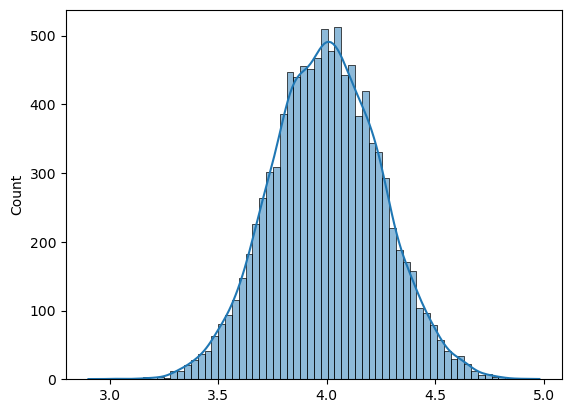

In [ ]:
sns.histplot(sample_mean_array,kde=True)

In [ ]:
# 샘플사이즈 변화

size_array = np.arange(10,100100,100)
size_array[:10]

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [ ]:
sample_mean_array_size = np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [ ]:
# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
    
print(sample_mean_array_size[:10])
sample_mean_array_size[990:]

[3.92228729 4.0383612  4.09185254 4.01346562 4.0047295  4.05765729
 3.98466861 3.99126955 3.98909837 4.03638272]


array([3.99954467, 4.00115947, 4.00311652, 3.99975072, 3.99989178,
       3.99777706, 3.99881193, 3.99936965, 3.99778023, 3.99851887,
       3.99990764])

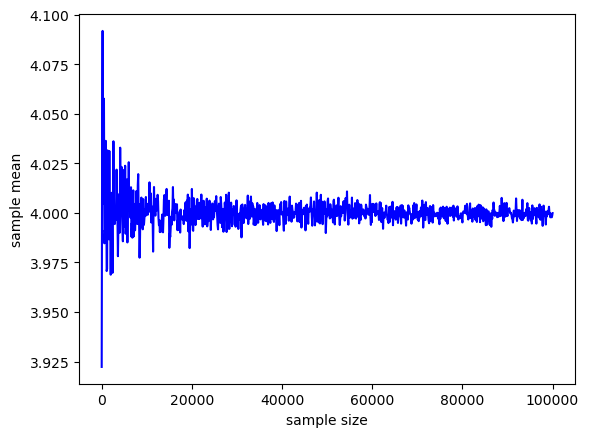

In [ ]:
plt.plot(size_array, sample_mean_array_size, color='b')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

In [ ]:
# 사용자 함수(표본평균 계산)

def cal_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i]  = population.rvs(size=size).mean()
    return sample_mean_array

np.mean(cal_sample_mean(size=10,n_trial=10000))

3.997093909071162

#### 과제2_0411.
상기 사용자 함수를 사용하여 샘플사이즈가 10,20,30이고 샘플갯수가 각각 10000개인 3개의 데이터프레임을 생성 후 결합한 후 바이올린 플롯을 그려서 인사이트트를 기술하세요.



In [ ]:
# 정규분포의 확률밀도 계산 - 연속형에 쓰임
# pdf (Probability Deisity Function) - loc는 평균, scale은 표준 편차임
# stats 모듈은 다양한 확률 분포를 포함한 통계적인 함수와 메소드를 제공합니다.
# 이를 통해 확률 분포의 확률밀도함수, 누적분포함수, 분위수 등을 계산하거나,
# 통계적 가설 검정, 회귀 분석, 분산 분석 등의 통계적 분석을 수행할 수 있습니다.

stats.norm.pdf(loc=4, scale=0.8, x=4)

0.49867785050179086

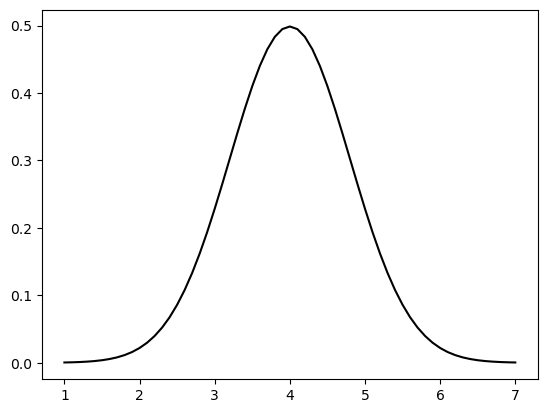

In [ ]:
# 정규분포의 확률밀도함수 (stats.norm.pdf)
# norm - 정규분포의, pdf - 확률밀도함수를 계산하는 함수
# 데이터의 범위를 충분히 커버하기 위한 숫자에 0.1을 더해서 그래프 끝부분을 좀 더 부드럽게 함
# 70개의 점임

x_plot = np.arange(1, 7.1, 0.1)    # 간격이 작을술록 더 부드러운 곡선
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color='black')

In [ ]:
# Q. 동일 확률밀도 함수에서 x=3일 때의 확률을 구하세요.
# 확률이 아닌 분포의 밀도를 나타냄, 0.5는 이 함수에서 가장 밀도가 높은 값임
# norm 객체에 pdf를 달면 x값을 다 넣어줘야 하고,
# pdf를 따로 빼주면 따로 x값을 넣어줘야 함

# 첫 번째 예시에서는 객체를 생성할 필요 없이 함수의 인자로 값을 직접 넣어줄 수 있습니다.
# 두 번째 예시에서는 객체를 생성하여 초기화한 후에 메소드를 호출하는 방식입니다.

# norm_dist = stats.norm(loc=4, scale=0.8)
# norm_dist.pdf(x=3)

# 이건 미분값이다(순간 기울기)

norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

stats.norm.cdf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 누적분포함수(Cumulative Distribution Function, CDF) 값을 계산하는 함수입니다. 
- 정규분포의 누적분포함수는 특정 값보다 작거나 같은 확률을 나타내는데, 이를 통해 특정 값의 분위수를 계산할 수 있습니다.

- stats.norm.cdf(x, loc=0, scale=1) 형태로 사용하며, x는 계산하고자 하는 분위수를 나타내는 값입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

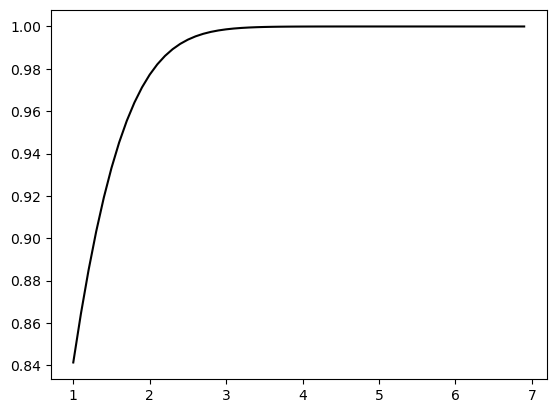

In [ ]:
# 누적분포함수
# 기본값이 loc=0, scale=1

x_plot = np.arange(1, 7.0, 0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot), color='black')
# plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=4, scale=0.8), color='black')


plt.show()

0.5

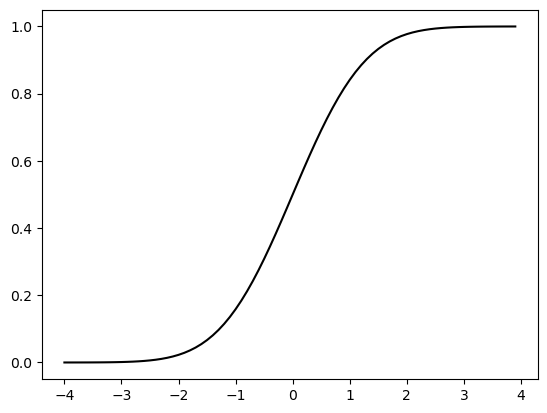

In [ ]:
x_plot = np.arange(-4, 4, 0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=0, scale=1), color='black')

In [ ]:
# 하측 확률
# 표준정규붙포에서 절반이니까 x=0일 때 0.5임

stats.norm.cdf(x=0)

0.5

In [ ]:
# Q. 평균이 5, 표준편차가 2인 정규분포에서 3이하의 확률 계산

stats.norm.cdf(x = 3, loc = 5, scale = 2)

0.15865525393145707

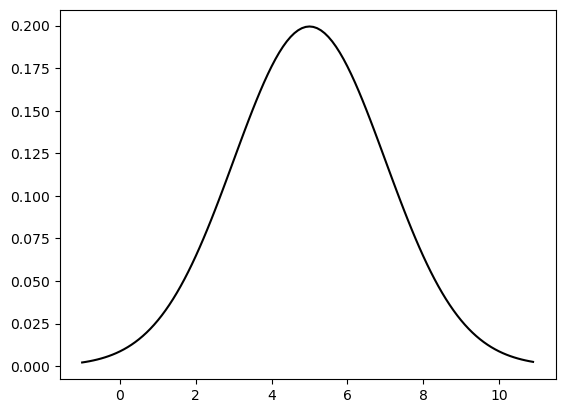

In [ ]:
x_plot=np.arange(-1, 11, 0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=5,scale=2),color='black')
plt.show()

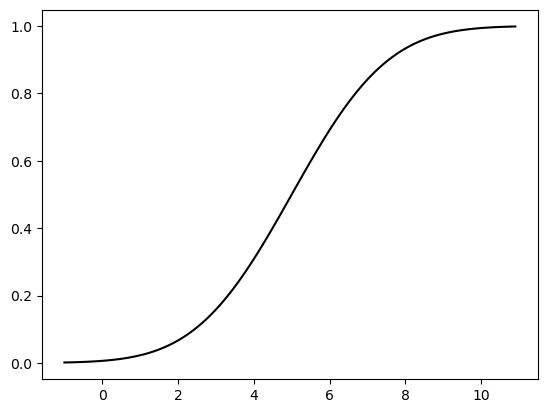

In [ ]:
x_plot=np.arange(-1, 11, 0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot,loc=5,scale=2),color='black')
plt.show()

stats.norm.ppf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 분위수(Percent Point Function, PPF) 값을 계산하는 함수입니다. 
- 정규분포의 분위수는 특정 확률을 가지는 값(또는 그보다 작은 값)을 계산할 수 있습니다.
- stats.norm.ppf(q, loc=0, scale=1) 형태로 사용하며, q는 계산하고자 하는 확률값을 나타내는 실수입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

In [ ]:
# 확률 0.8, 위 누적 그래프에서 y축 - x값 구하는 것임(PPF)
# 확률 분포함수의 역함수

from scipy.stats import norm

x = norm.ppf(0.8, loc=5, scale=2)
print(x)

6.683242467145829


In [ ]:
# Q. 평균 4, 표준편차 0.8인 정규분포에서 확률이 0.5일 때의 분위수 값을 계산하세요.

x = norm.ppf(0.5, loc=4, scale=0.8)
print(x)

4.0


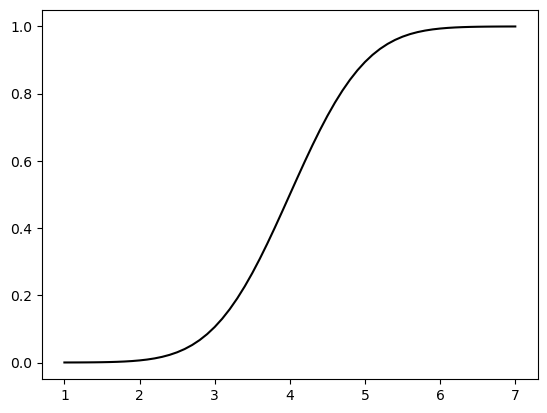

In [ ]:
x_plot=np.arange(1, 7.1, 0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot,loc=4,scale=0.8),color='black')
plt.show()

#### 자유도
- 평균이 5이면, 5, 5, 다음에는 5가 정해짐, 2, 6이면 7이 올 수 밖에 없음, 그래서 n-1임
- 통계량이란, 특정한 표본에서 계산되는 어떤 수치를 말합니다. 예를 들어, 표본의 평균이나 분산 등이 통계량이 될 수 있습니다. 이때, 표본의 크기가 작아질수록 통계량을 계산할 때, 계산에 사용되는 데이터의 수가 줄어들기 때문에, 계산에 대한 제약이 더욱 커집니다.
- 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 자유도(degree of freedom)라고 합니다. 자유도가 크면 큰 값, 작으면 작은 값이 나올 수 있고, 이에 따라서 추정 결과가 바뀔 수 있습니다.
- 자유도란, 통계학에서 모집단의 분포를 추정하거나 가설 검정을 할 때, 적게는 1개, 많게는 여러 개의 표본으로부터 통계량을 계산할 때, 표본의 자유도를 말합니다. 간단하게 말하면, 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 의미합니다. 이는 분석하고자 하는 문제나 실험의 특성에 따라 달라지며, 모집단의 분산 추정량을 계산할 때 등 다양한 상황에서 사용됩니다.
- 어떤 학급의 수학시험에서, 20명의 학생들이 시험을 보았고, 각 학생들의 점수를 알고 있다고 가정해봅시다. 이때, 평균 점수를 계산하기 위해서는 각 학생의 점수를 모두 더한 후, 학생 수로 나누면 됩니다. 이때, 평균 점수를 계산할 때는 자유도가 n-1이 됩니다. 이는 계산에 사용되는 데이터의 수(20)에서 1을 뺀 값이기 때문입니다. 따라서, 평균 점수를 계산할 때, 각 학생의 점수를 자유롭게 지정할 수 있는 정도가 n-1만큼 되는 것입니다.
    - 다른 값은 다 바꿀 수 있는데 평균값은 바꿀 수 없기에 -1이다(우리가 계산을 안해서 그렇지 평균은 존재하고 있으니까)
- 이와 같이, 자유도는 계산에 사용되는 데이터의 수에 따라서 결정되며, 데이터의 수가 적을수록 자유도는 작아지게 됩니다. 따라서, 작은 자유도를 가진 경우에는 계산에 대한 제약이 더욱 커지게 되므로, 이를 고려하여 적절한 분석 방법을 선택해야 합니다.

In [ ]:
자유도가 작을 경우 (sample이 30개 정도면 정규분포 씀), 즉 30개 미만일 때는 T분포 써야 한다



t분포란
- 일반적으로 여러 실험을 해보면 데이터가 평균 근처에 많이 분포하고 평균에서 많이 멀어질수록 적게 분포하는 형태를 띠는 정규분포를 띠는 경우가 많다. 그런데 정규분포는 표본의 수가 적으면 신뢰도가 낮아진다.
- 신뢰도를 높이기 위하여 표본을 많이 뽑으면 되지만 현실적으로 시간과 비용의 제약으로 한계가 있으며, 이에 대한 대응책으로 정규분포보다 한 단계 예측범위가 넓은 분포를 사용하는데 바로 t분포이다.
- t분포는 정규분포와 표준정규분포처럼 표준이 되는 그래프는 없으며 대신 표본의 수에 따라서 그래프의 모양이 변하며 표본의 수가 많아질수록 점점 표준정규분포와 비슷해지고 표본의 수가 적어질수록 그래프는 점점 옆으로 퍼진다.
- t분포는 확률을 구하는 경우 보다는 신뢰구간 혹은 가설 검정에 주로 사용하는데 특히 표본의 수가 30개 미만일 때 정규분포 대신 예측범위가 넓은 t분포를 사용한다.표본의 수가 30개 이상이면 정규분포와 비슷해지기 때문에 정규분포를 사용하는 것이 바람직하다.
    - 샘플수 자체가 작기에 확률 구하는 것은 신뢰도가 떨어지니까(정규분포보다)
- t분포로 신뢰구간을 추정하고 가설검정을 할 때 t값을 알아야 하는데 t값은 x축 좌표이다.
- t-값은 t-분포에서의 값으로, 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값입니다. t-값은 표본에서 계산된 통계량으로, 이를 바탕으로 모집단의 특성에 대한 가설을 검증하고, 모집단에 대한 추론을 수행
- t-값은 해당 표본이 모집단과 얼마나 다른지, 혹은 모집단과 유사한지 등을 파악하는 데 사용됩니다. t-값이 크다는 것은 표본과 모집단이 서로 매우 다르다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표하지 못할 가능성이 높습니다. 반면, t-값이 작다는 것은 표본과 모집단이 서로 유사하다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표할 가능성이 높습니다.
-  t-값은 가설 검정에서 중요한 역할을 합니다. 예를 들어, 표본을 사용하여 모집단의 평균이 어떤 값과 차이가 있는지를 검정할 때, t-값을 사용하여 가설 검정을 수행합니다. 이를 통해, 모집단에 대한 가설이 기각되는 경우, 해당 모집단과 표본 간에 차이가 있다는 것을 의미하며, 가설이 채택되는 경우, 해당 모집단과 표본 간에 차이가 없다는 것을 의미합니다.

t분포는 
- 통계학에서 가설 검정과 신뢰구간 추정에 사용되는 분포입니다. t분포는 정규분포와 유사하지만, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있도록 고안된 분포입니다. 표본의 크기가 커질수록 t분포는 정규분포에 수렴하게 됩니다.
- t분포를 사용하는 이유는 크게 두 가지로 나뉩니다. 첫째, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있습니다. 둘째, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다. 모집단의 분산을 알지 못할 때는 t분포를 이용하여 검정을 하며, 이 경우에는 검정통계량에 대한 검정력이 낮아질 수 있습니다.
- 아래는 t분포를 사용하는 예시입니다.
  - 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다고 가정해봅시다. 이 경우, 각각의 신약에 대한 효과를 비교하기 위해서는 t-검정(t-test)을 사용할 수 있습니다. t-검정은 두 집단의 평균값이 서로 다른지를 검정하는 방법으로, 검정통계량 t를 계산하여 유의수준(alpha)과 비교하여 검정을 수행합니다. 
      - 1-95%(신뢰수준) = 0.05 (0.025씩임)
      - 유의수준이 높으면(95%>99%), 100번 중 5번의 오류를 허용하겠다는 의미 -> 그러면 귀무가설을 기각하기 위해 더 강력한 증거가 필요함
      - 작은 값일수록 더 엄격한 기준
      - 가설 검정에서 실수를 허용할 수 있는 범위
      - 유의수준이 0.05로 설정되어 있다면, 귀무가설이 참이라고 가정하고도 5%의 확률로 귀무가설을 잘못 기각할 수 있는 것을 허용하는 것입니다.
  - 만약 검정결과 t값이 양의 값이라면, 첫 번째 집단의 평균값이 더 크다는 것을 의미하며, 음의 값이라면 두 번째 집단의 평균값이 더 크다는 것을 의미합니다. 검정통계량 t는 자유도(n-1)을 가진 t분포를 따르게 됩니다. 따라서, 이 경우 t분포를 이용하여 검정통계량 t에 대한 유의확률(p-value)을 계산할 수 있습니다.
    - 유의수준보다 유의확률이 작으면 귀무가설을 기각하고, 유의수준보다 유의확률이 크면 귀무가설을 채택합니다.
    - 예를 들어, 유의수준을 0.05로 설정한 경우, 유의확률이 0.03이라면 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 하지만 유의확률이 0.10이라면 귀무가설을 기각하지 않고 귀무가설을 채택할 수 있습니다. 유의수준과 유의확률은 통계적 가설 검정에서 중요한 개념으로, 결과의 해석에 사용되며 결정을 돕는 도구로 활용됩니다.
    - 이와 같은 방식으로, t분포를 이용하여 작은 표본의 경우에도 정확한 검정 결과를 얻을 수 있으며, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다.
- 임계값
    - 임계값(critical value)은 가설 검정에서 귀무가설을 기각 또는 기각하지 않을지를 결정하는 기준이 되는 값입니다. 유의수준(alpha)과 함께 사용되며, 가설 검정 통계량 값이 이 임계값보다 크거나 작으면 귀무가설을 기각하고, 그렇지 않으면 귀무가설을 기각하지 않고 채택합니다.
    - 임계값은 통계적 분포의 분위수(Percentile)로서, 특정 유의수준에 대응되는 값으로 결정됩니다. 예를 들어, 정규분포를 따르는 가설 검정에서는 Z-분포나 t-분포의 임계값을 사용하며, 이 값은 통계적 표에서 확인할 수 있습니다. 유의수준이 낮을수록 임계값은 더 큰 값이 되어 귀무가설을 기각하기 어려워지며, 유의수준이 높을수록 임계값은 작은 값이 되어 귀무가설을 기각하기 쉬워집니다.
    - 임계값은 가설 검정의 결과를 해석하고 결정하는데 중요한 역할을 하며, 임계값을 사용하여 귀무가설을 기각할지, 기각하지 않을지를 결정합니다.

#### 과제1_0417.
다음 사례에서 두 가지 신약의 효과를 비교하기 위하여 t검정을 수행하세요.

- 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다.
- X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
- 유의수준 0.05

귀무가설 : 두 신약의 효과는 차이가 없다(두 집단의 평균값의 차이는 0이다)

대립가설 : 두 신약의 효과는 차이가 있다(두 집단의 평균값의 차이는 0이 아니다)

t값과 유의수준 비교해서 하는 것임

가설을 세우고, 그에 대한 검증을 하는 것임

In [ ]:
import numpy as np
from scipy.stats import t

# X1과 X2의 데이터를 입력합니다.
X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 각 집단의 평균값과 표준편차를 계산합니다.
x1_mean = np.mean(X1)
x2_mean = np.mean(X2)
print(x1_mean, x2_mean)

x1_std = stats.tstd(X1)
x2_std = stats.tstd(X2)
print(x1_std, x2_std)
# t-검정을 수행하기 위한 변수를 계산합니다.


# 유의수준을 0.05로 설정하고, 양측 검정을 수행합니다.

# 검정 결과를 출력합니다.

7.5 6.5
3.0276503540974917 3.0276503540974917


#### 과제2_0417.
위 사례에서 두 가지 신약의 효과를 비교하기 위하여 p값으로 검정을 수행하세요.

In [ ]:
import scipy.stats as stats

# 데이터셋
X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 표본 통계량 계산
mean1 = stats.tmean(X1) # X1의 평균
mean2 = stats.tmean(X2) # X2의 평균
std1 = stats.tstd(X1) # X1의 표준편차
std2 = stats.tstd(X2) # X2의 표준편차
n1, n2 = len(X1), len(X2) # 각 데이터셋의 샘플 크기

# t-값 계산
mean_diff = mean1 - mean2 # 두 평균의 차이
pooled_std = ((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2) # 두 표본의 풀도 표준편차
t_value = mean_diff / (pooled_std * ((1/n1) + (1/n2))**0.5) # t-값 계산

# 유의수준 0.05에서의 검정
alpha = 0.05
df = n1 + n2 - 2 # 자유도
critical_value = stats.t.ppf(1 - alpha/2, df) # 양측 검정일 때의 임계값
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df)) # 양측 검정일 때의 p-값

print("t-값 (t-value):", t_value)
print("임계값 (Critical value):", critical_value)
print("p-값 (p-value):", p_value)

# 귀무가설 기각 여부 판단
if abs(t_value) > critical_value:
    print("귀무가설을 기각합니다.")
else:
    print("귀무가설을 채택합니다.")


t-값 (t-value): 0.24393468845452249
임계값 (Critical value): 2.10092204024096
p-값 (p-value): 0.8100400871094711
귀무가설을 채택합니다.


In [ ]:
# t-value는 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값으로 계산
# tstd = std의 ddof=1 옵션과 같음 (비편향보정이 적용된 표준편차 값을 구함)
# tstd - 비편향 표본 표준 편차를 계산하는 함수
# ddof=1은 편향 보정에 사용되는 자유도 보정값 (편향 -> 과소평가 경향 보임), 비편향으로 보정하는 것임

sample_data = [2.3, 3.5, 1.8, 4.1, 2.7]
sample_mean = sum(sample_data) / len(sample_data)    # 표본 평균 계산
sample_std = stats.tstd(sample_data)    # 표본 표준편차 계산
pop_mean = 3.0    # 모집단 평균 가정
t_value = (sample_mean - pop_mean) / (sample_std / len(sample_data)**0.5)    # 표준오차로 나누는 이유는 오차가 커지면 분자의 값은 작아지기 때문임
t_value                            # 루트n? 0.5는?

-0.2907009498669058

In [ ]:
# np.std(sample_data, ddof=1)
stats.tstd(sample_data) # 기본값이 ddof=1인 것 같음

0.923038460737146

In [ ]:
# t값의 표본분포
# t값 10,000개를 뽑은 것임
# t분포도 정규분포이다

from scipy import stats

np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0,10000):
    sample = norm_dist.rvs(size=10)    # sample 10개 뽑음
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_se = sample_std/np.sqrt(len(sample))    # standard error (표준오차)
    t_value_array[i] = (sample_mean - 4)/sample_se


<AxesSubplot:ylabel='Density'>

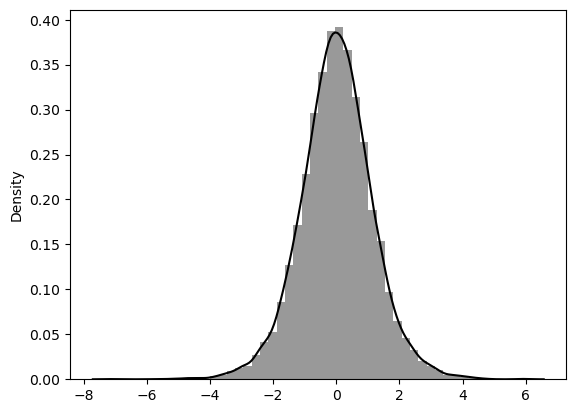

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(t_value_array, color='black')


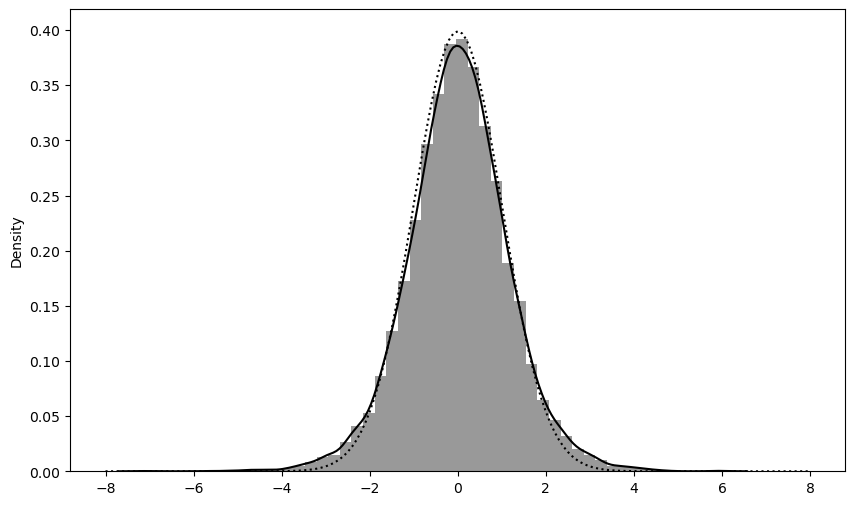

In [ ]:
# 표준 정규 분포와 같이 그려서 비교해보기
# 표본의 수가 적을수록 옆으로 퍼진다. 그래서 정규 분포 대비 옆 으로 퍼져 있는것 볼 수 있음

plt.figure(figsize=(10,6))

sns.distplot(t_value_array, color='black')


plt.plot(x,stats.norm.pdf(x=x),
        color='black', linestyle='dotted')    # 표준정규분포가 됨(아무 것도 없으면 디폴트가 평균0, 표준편차1)

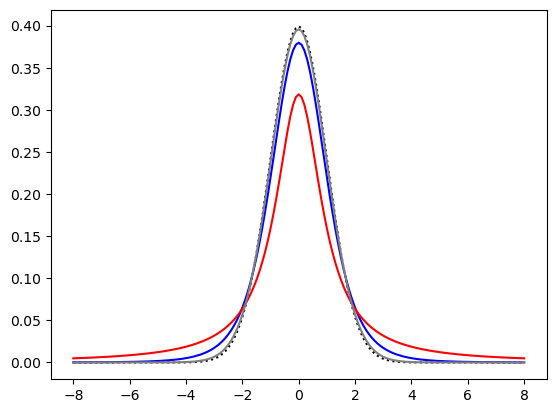

In [ ]:
# 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴

plt.plot(x,stats.norm.pdf(x=x),
         color='black', linestyle='dotted')
plt.plot(x,stats.t.pdf(x=x, df=5),                   # 자유도 5로 한 것
         color='blue')
plt.plot(x,stats.t.pdf(x=x, df=1),
         color='red')
plt.plot(x,stats.t.pdf(x=x, df=30),                  # sample 갯수가 30개가 되면 정규분포에 근점, 그래서 30새 이상이면 t분포 쓸 이유 없음
         color='gray')

#### 과제1_0412.
pdf, cdf, ppf를 활용하여 확률과 분위수를 구하는 사례를 작성하여 그 결과를 값과 그래프(확률밀도함수, 누적분포함수)로 출력하세요

In [ ]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')

e_score = df.english
e_score.head(3)
e_score.sort_values().unique()

array([37, 41, 42, 45, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73, 75, 79], dtype=int64)

In [ ]:
# 평균과 표준편차 구하기
mu = e_score.mean()
print('평균=> ', mu)

sigma = np.std(e_score)
print('표준편차=> ', sigma)

평균=>  58.38
표준편차=>  9.70131949788275


In [ ]:
# 70점일 때의 확률?

stats.norm.pdf(loc=mu, scale=sigma, x=70)

0.020069918696892623

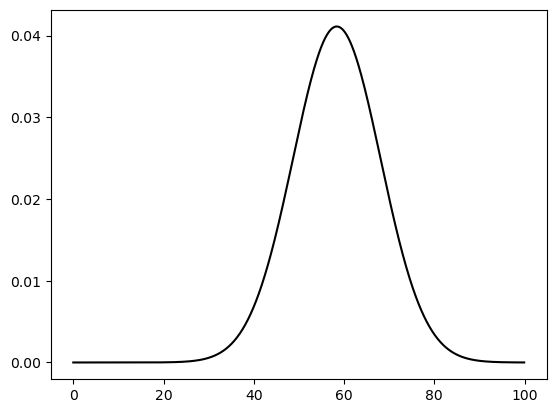

In [ ]:
# 확률밀도함수 (PDF, Probability Deisity Function)

# x_plot = np.arange(37, 79.1, 0.1)    #잘 모르겠지만 데이터의 최솟값과 최댓값이 들어가는 범위 지정해 줌
x_plot = np.arange(0, 100, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=mu, scale=sigma), color='black')

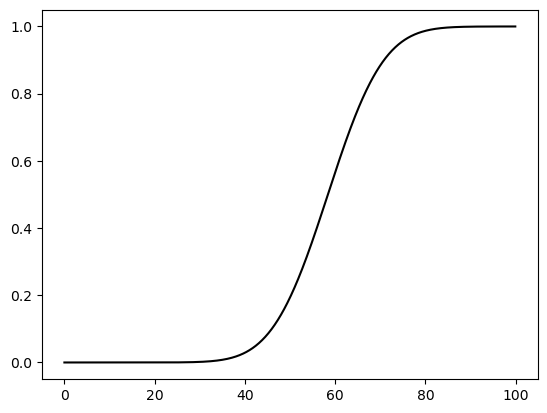

In [ ]:
# 누적 분포 함수 (CDF, Cumulative Distribution Function)

x_plot = np.arange(0, 100, 0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=mu, scale=sigma), color='black')

In [ ]:
# 하측 확률

stats.norm.cdf(x=mu, loc=mu, scale=sigma)

0.5

In [ ]:
# 평균이 58.38, 표준편차가 9.70131949788275인 정규분포에서 평균이 40점 이하일 확률

stats.norm.cdf(x=40, loc=mu, scale=sigma)

0.029073526859765948

In [ ]:
# 평균이 58.38, 표준편차가 9.70131949788275인 정규분포에서 확률이 0.0290일 때의 분위수 값

x = stats.norm.ppf(0.029073526859765948, loc=mu, scale=sigma)
print(x)

40.0


#### 과제2_0412.
t분포의 자유도를 5개로 조정하면서 그래프의 모습이 표준 정규 분포 대비 어떻게 변하는지를 확인할 수 있는 그래프를 출력하세요.

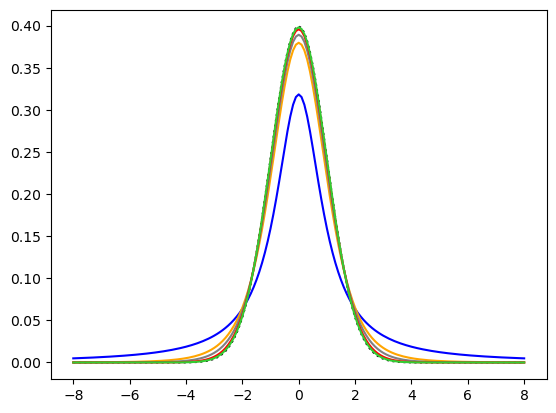

In [ ]:
plt.plot(x,stats.norm.pdf(x=x),
         color='black', linestyle='dotted')

plt.plot(x,stats.t.pdf(x=x, df=1),                
         color='blue')

plt.plot(x,stats.t.pdf(x=x, df=5),
         color='orange')

plt.plot(x,stats.t.pdf(x=x, df=10),
         color='gray')

plt.plot(x,stats.t.pdf(x=x, df=30),
         color='red')

plt.plot(x,stats.t.pdf(x=x, df=100),
         color='limegreen')

#### 통계적 추정 : 모수 즉 모집단의 파라미터를 추정
- 모집단 분포가 정규분포임을 가정했을 때 모수를 알면 모집단 분포를 추정할 수 있음
- 점추정 : 모수를 어느 1개의 값으로 추정하는 방법
 - 모평균 추정에 표본평균을 사용하는데 표본평균은 불편성과 일치성을 가지고 있는 통계량이기 때문임
 - 모분산의 점추정값으로 표본에서 계산된 통계량으로 불편분산을 사용
- 구간추정 : 추정값이 폭을 가지게 하는 추정 방법. 추정의 폭 계산에는 확률의 개념을 사용
 - <span style='color:red'>통계적으로 추정하고자 하는 모수(평균, 분산, 비율 등)가 포함될 것으로 예상되는 구간을 계산한 것
 - 폭을 가지므로 추정오차를 가미할 수 있으며 추정오차가 작으면 구간 추정의 폭이 좁아짐.
     정확할수록 폭을 적게 해도 됨
 - 샘플사이즈가 커져도 구간 추정의 폭은 좁아짐
 - 대립가설을 간접적으로 이용하는 방법 (가설 검증에서)
- 신뢰계수(신뢰수준)와 신뢰구간
 - 신뢰계수란 구간 추정의 폭에 대한 신뢰 정도를 확률로 표현한 것. 95%, 99%
     - <span style='color:red'>모수가 포함될 것으로 추정되는 구간의 신뢰 수준</span>
     - 구간추정 안에 들 확률
     - 99%는 목표임
 - 신뢰구간이란 특정 신뢰계수를 만족하는 구간
    - <span style='color:red'>구간 추정의 한 형태, 표본을 사용하여 모수에 대한 신뢰성 있는 구간을 계산하는 것을 의미함</span>
    - <span style='color:red'>구간 추정의 결과를 나타냄</span>
 - 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐
     - 힘들기 때문에 넓게 잡아야 함
- 신뢰한계 : 신뢰구간의 하한값과 상한값
- 신뢰구간 계산 : "(표본평균 - 모평균) / 표준오차"로 계산한 t값. 구간추정을 할 때는 t분포의 퍼센트포인트 사용
 - 신뢰계수를 95%라고 했을 때 t분포를 따른다면 2.5% 지점과 97.5% 지점을 계산. 
     - 오차가 5%면, 양쪽으로 2.5%니까 위와 같이 됨
 - t분포를 따르는 변수가 이 구간에 들어갈 확률은 95%가 됨
 - 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐 (추정치의 신뢰성이 떨어짐, 변동성 커서)
 - 샘플사이즈가 커지면 자유도가 커지고 표준오차가 작아짐
 - 신뢰계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐

예를 들어, 100명의 학생들의 키를 측정하여 표본평균을 계산하였습니다. 이 때, 표본의 크기는 100이며, 표본평균은 170cm입니다. 이러한 데이터를 바탕으로 모집단의 평균을 추정하고자 합니다. 이 때, 신뢰구간을 이용하여 추정값의 신뢰도를 평가할 수 있습니다.

먼저, 신뢰수준(confidence level)을 설정합니다. 신뢰수준은 추정값이 구간 내에 존재할 확률로, 일반적으로 95%나 99%로 설정됩니다. 이번 예시에서는 신뢰수준을 95%로 설정하겠습니다.

다음으로, 표본의 크기와 분산을 이용하여 표준오차(standard error)를 계산합니다. 표준오차는 표본평균과 모집단 평균의 차이를 추정하는 데 사용되는 지표입니다. 표준오차를 계산하기 위해서는 표본평균의 표준편차(standard deviation)와 표본의 크기가 필요합니다. 이번 예시에서는 표본의 표준편차가 5cm, 표본의 크기가 100명이므로, 표준오차는 다음과 같이 계산됩니다.

표준오차 = 5 / sqrt(100) = 0.5 (루트n하는 것임)

표본의 불확실성임

마지막으로, 추정값과 신뢰수준, 표준오차를 이용하여 신뢰구간을 계산합니다. 이번 예시에서는 95%의 신뢰수준을 가지고 있으므로, 신뢰구간은 다음과 같이 계산됩니다.

신뢰구간 = 추정값 ± (신뢰계수 * 표준오차)
= 170 ± (1.96 * 0.5)
= (169.02, 170.98)
- 신뢰계수는 구할 수 있음
- <span style='color:red'>95%면 0.95가 신뢰계수인데 이것의 Z-score 값인 1.96을 사용한다</span>

즉, 95%의 신뢰수준으로 모집단의 평균을 추정할 때, 모평균은 약 169.02cm부터 170.98cm까지의 범위 내에 존재할 것으로 예상됩니다.

- <span style='color:red'>구간 추정의 폭을 증가시키는 것</span>
    - 표준편차-표준오차 증가
    - 신뢰수준 높임
    - 표본 크기 작을수록
- <span style='color:red'>구간 추정의 폭을 감소시키는 것</span>
    - 샘플 사이즈 증가 -> 자유도 증가, 표준 오차 작아짐
    - 표본 크기 클수록
    - 신뢰수준 낮출수록

표준오차(standard error)는 표본에서 추출된 통계량이 모집단에서의 실제 값과 얼마나 차이가 나는지를 나타내는 지표입니다. 즉, 표본 평균 등의 통계량이 얼마나 정확한지를 나타내는 값입니다.

표준오차는 다음과 같이 계산됩니다.

표준오차 = (표준편차 / √n)

여기서,

표준편차는 표본에서 추출된 값들의 분산의 제곱근입니다.
n은 표본의 크기입니다.
즉, 표준오차는 표본의 크기가 커질수록 작아지며, 분산이 작을수록 작아지는 값입니다. 또한, 모집단에서 추출된 모든 가능한 표본들을 이용해 표준오차를 계산하면 모평균과의 차이가 가장 작은 값을 얻을 수 있습니다. 따라서, 표준오차는 표본평균 등의 통계량이 얼마나 정확한지를 판단할 때 유용하게 사용됩니다.

예를 들어, 키에 대한 조사에서 100명의 표본을 추출하여 평균 키를 계산하였고, 이때 표준편차가 5cm이라면, 이 표본의 평균 키가 모평균에서 얼마나 떨어져 있는지를 나타내는 표준오차는 다음과 같습니다.

표준오차 = (5 / √100) = 0.5

따라서, 이 표본의 평균 키는 모평균에서 약 0.5cm 정도 떨어져 있다고 해석할 수 있습니다.

신뢰수준(Confidence level)과 신뢰계수(Confidence interval)는 서로 다른 개념입니다.

신뢰수준(Confidence level)은 통계학에서 표본 추정치가 모집단의 파라미터에 대해 얼마나 신뢰할 수 있는지를 나타내는 확률입니다. 일반적으로 90%, 95%, 99%와 같이 백분율로 표현되며, 높을수록 표본 추정치가 모집단의 파라미터와 일치할 확률이 더 높습니다. 예를 들어, 95%의 신뢰수준은 "이 추정치는 실제 모집단의 파라미터와 차이가 없을 확률이 95%라고 추정된다"는 의미입니다.

신뢰계수(Confidence interval)는 통계학에서 추정치의 불확실성을 나타내는 구간으로, 신뢰수준에 따라 추정치를 둘러싼 구간을 말합니다. 예를 들어, 95% 신뢰수준에서의 신뢰계수는 "이 추정치가 포함된 구간이 95%의 확률로 실제 모집단의 파라미터를 포함한다"는 의미입니다. 일반적으로 신뢰계수는 추정치의 정확성을 나타내는 범위로 표현되며, 작은 신뢰계수는 추정치의 불확실성이 크다는 것을 나타냅니다.

따라서, 신뢰수준과 신뢰계수는 서로 다른 개념이며, 신뢰수준은 추정치의 신뢰성을 나타내는 확률이고, 신뢰계수는 추정치의 불확실성을 나타내는 범위입니다.

신뢰 계수(confidence level)는 구간 추정에서 사용되는 통계적인 개념으로, 모수가 포함될 것으로 추정되는 구간의 신뢰 수준을 나타냅니다. 일반적으로 95%, 90%, 99%와 같이 지정되며, 이는 해당 구간이 모수를 포함할 것으로 예상되는 확률을 나타냅니다.

신뢰 계수는 통계적인 방법을 사용하여 추정됩니다. 가장 일반적으로 사용되는 방법은 표준 정규분포 또는 t-분포를 이용한 방법입니다. 다음은 표준 정규분포를 이용한 신뢰 계수의 구하는 공식입니다:

표준 정규분포를 따르는 확률변수 Z의 (1-α/2) 백분위수와 (-α/2) 백분위수를 구합니다. 여기서 α는 1 - 신뢰 계수로, 보통 0.05(5%)가 사용됩니다. 예를 들어, 95% 신뢰 수준을 사용한다면, α는 0.05가 됩니다.

(1-α/2) 백분위수와 (-α/2) 백분위수 사이의 구간이 신뢰 구간이 됩니다. 이 구간은 모수를 포함할 것으로 추정되는 구간이며, 신뢰 수준이 높을수록 더 넓은 구간이 됩니다.

t-분포를 사용하는 경우에도 비슷한 원리로 신뢰 계수를 구할 수 있습니다. 다만, 표본의 크기가 작거나 모집단이 정규분포를 따르지 않는 경우에 t-분포를 사용하여 보다 정확한 신뢰 구간을 구할 수 있습니다.

신뢰 계수는 구간 추정 결과를 해석하고 모수의 불확실성을 평가하는 데 중요한 역할을 합니다. 더 높은 신뢰 계수는 더 넓은 구간을 생성하게 되므로, 추정의 정확성이 높아질 수 있지만, 반대로 더 낮은 신뢰 계수는 더 좁은 구간을 생성하게 되며, 이는 추정의 정확성이 낮아질 수 있음을 유의해야 합니다.

In [ ]:
df = pd.read_csv('../../dataset/5_7_fl.csv')
df

,length
0,4.352982
1,3.735304
2,5.944617
3,3.798326
4,4.087688
5,5.265985
6,3.272614
7,3.526691
8,4.150083
9,3.736104


In [ ]:
# 모평균의 점추정

fish = df.length
mu = np.mean(fish)
round(mu,2)

4.19

In [ ]:
# 모분산의 점추정
# ddof=1, n-1 등은 표본 분산을 계산할 때 사용되는 자유도 조정값임
# 표본의 분편분산 -> 추정 -> 모분산의 값(추정치)으로 사용함
# 자유도의 보정을 제어하는 매개변수

sigma_2 = np.var(fish, ddof=1)
round(sigma_2,2)

0.68

In [ ]:
# 표준오차(se, standard error) - 표준편차/표본크기의 제곱근

sigma = np.std(fish,ddof=1)    # 모집단의 표준편차임
se = sigma/np.sqrt(len(fish))    # 표준오차
round(se,2)

0.26

In [ ]:
# 자유도 보정을 위해 n-1을 만듦

df = len(fish) - 1
df

9

In [ ]:
# stats.t.interval
# t-분포를 이용하여 신뢰 구간(confidence interval)을 계산하는 함수 (모집단의 평균에 대해서만!!)
    # alpha - 신뢰 수준(confidence level) 0~1사이, 주로 0.95 
    # df - degree of freedom, 자유도, t-분포의 모수로 사용되는 값 (일반적으로 표본 크기에서 1을 뺀 값으로 지정)
    # loc - 평균값으로, 표본의 평균값임
    # scale - 표준 오차(standard, error)로, 표본의 표준 편차값을 사용함

interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [ ]:
# 표준편차를 10배로 늘려서 신뢰구간 계산
# 표준 편차 증가 -> 표준 오차 증가 -> 구간 추정의 폭 증가

se2 = sigma*10/np.sqrt(len(fish))
stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se2)

(-1.7132533521824618, 10.087332001191509)

In [ ]:
# Q. 샘플 사이즈를 10배로 늘려서 신뢰구간 계산 -> 줄어듦

df2 = len(fish)*10-1
se3 = sigma/np.sqrt(len(fish)*10)    # 표준오차 바꿔줘야 함, n이 바뀌니까
stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [ ]:
# 신뢰수준 95% vs 99%

interval = stats.t.interval(alpha=0.99, df=df, loc=mu, scale=se)    # df - 자유도, 여기서는 표준오차를 scale에 써주는 것임
interval

(3.3393979149413977, 5.034680734067649)

#### z분포와 t분포에서 신뢰구간 계산 방법의 차이
- z분포 : 평균이 이고, 표준편차가 1인 분포

z분포와 t분포는 모집단의 평균을 추정하기 위해 사용되는 확률분포입니다. 하지만, z분포는 모집단의 표준편차를 알고 있을 때, t분포는 모집단의 표준편차를 알지 못할 때 사용됩니다. 따라서, z분포는 큰 표본(일반적으로 30개 이상)에 대해서 사용되며, t분포는 작은 표본에 대해서 사용됩니다. (모분산 알고 모르고의 여부)

z분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (z분포의 임계값 * (표준편차/√n)), 표본평균 + (z분포의 임계값 * (표준편차/√n)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
z분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 알고 있을 때, 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준편차는 표본의 분산의 제곱근입니다.
n은 표본의 크기입니다.
반면, t분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (t분포의 임계값 * (표준오차)), 표본평균 + (t분포의 임계값 * (표준오차)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
t분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 모르고 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준오차는 표본의 표준편차를 이용해 계산됩니다.
즉, t분포에서는 모집단의 분산을 알지 못하기 때문에, 표본의 분산을 이용하여 표준편차를 구합니다.

#### 과제3_0412.
- 크기가 10인 표본 데이터를 생성하고 평균과 표준편차를 구하세요
- 신뢰수준을 95%로 설정하고 자유도를 계산하세요.
- 신뢰구간을 계산하고 결과를 출력하세요.

In [ ]:
# Data를 불러오고, 아래의 자유도 변수와 겹치지 않도록 df이름 변경
# dataframe, series, array 등으로 불러올 수 있는데, 차이를 자세히는 모르겠는데,
# 일단 dataframe에는 적용 안되는 함수가 있는 등의 이유로 series로 뽑음 (array 등은 또 모르겠음)

df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')

# df = df[['english']]    # 리스트로 전달하여 -> DataFrame 형태로 열을 가져옴
e_score = df.english    # dot 연산자를 사용하여 열을 가져옴 -> Series 형태의 데이터를 반환
e_score.head(3)

student number
1    42
2    69
3    56
Name: english, dtype: int64

In [ ]:
# 랜덤으로 10개의 표본 데이터 생성, 추출
# replace는 True, False 상관없는 것 같긴 함?

np.random.seed(0)
e_score_10 = np.random.choice(e_score, 10, replace=False)    #replace하면 중복 방지
# np.random.choice(df, size=10, replace=False)
e_score_10

array([47, 47, 70, 57, 56, 61, 62, 54, 61, 57], dtype=int64)

In [ ]:
# 지금 과제가 표본 통계량을 통한 구간 추정 방식으로 모르고 있는 모수를 추정하는건데,
# 10개를 추출하기 전의 데이터의 평균이 실제 모평균인듯 -> 후에 나온 결과와 비교


print('<참고> - 후에 결과와 비교해 보려고','\n')
print('모평균=> ', e_score.mean())
print('표본평균=> ', e_score_10.mean(),'\n')

print('모집단의 표준편차=> ', np.std(e_score))
print('표본 표준편차(그냥)=> ', np.std(e_score_10))
print('표본 표준편차(불편표준편차, 모집단의 표준편차 추정치, 예측치)=> ', np.std(e_score_10, ddof=1))

<참고> - 후에 결과와 비교해 보려고 

모평균=>  58.38
표본평균=>  57.2 

모집단의 표준편차=>  9.70131949788275
표본 표준편차(그냥)=>  6.6000000000000005
표본 표준편차(불편표준편차, 모집단의 표준편차 추정치, 예측치)=>  6.957010852370435


In [ ]:
# 표본 평균과 표준편차 구함 - ddof1을 줘서 보정해줌(불편, 비편향 보정)
    # 모집단에서 뽑은, 그 부분집합인 표본의 수치들을 가지고 표준편차, 분산 등을 구하는 것이기에 과소평가 문제
    # 표분 평균은 모평균보다 크거나 작을 수 있다    

# 밑에 interval 함수에 매개변수로 들어갈 mu 변수 생성

# 여기의 표준편차 sigma는 밑에서 표준 오차 계산할 때 사용할 것임

mu = np.mean(e_score_10)

print('표본평균=> ', mu)

std = np.std(e_score_10, ddof=1)
print('불편평균(모평균의 표준편차 추정치)=> ', std)

표본평균=>  57.2
불편평균(모평균의 표준편차 추정치)=>  6.957010852370435


In [ ]:
# 자유도 계산 (보편적인 n-1 적용)

# interval 함수에 들어갈 자유도 설정

df = len(e_score_10) - 1
df

9

In [ ]:
a = np.array([80,85,90,95,100])
np.std(a, ddof=1)

7.905694150420948

In [ ]:
# 표준 오차 계산 (SE, Standard Error)

# 표준오차 공식 = 표본표준편차 / sqrt(n) (루트n하는 것임)

# interval 함수에 들어갈 표준오차 설정

se = std/np.sqrt(len(e_score_10))
round(se,2)

2.2

In [ ]:
# 신뢰구간을 계산하고 결과를 출력 (신뢰수준 - 95%)

# t-분포를 이용하여 신뢰 구간(confidence interval)을 계산하는 함수 (모수 중 모평균 추정에 대해서만!!)
    # alpha - 신뢰 수준(confidence level) 0~1사이, 주로 0.95 
    # df - degree of freedom, 자유도, t-분포의 모수로 사용되는 값 (일반적으로 표본 크기에서 1을 뺀 값으로 지정)
    # loc - 평균값으로, 표본의 평균값임
    # scale - 표준 오차(standard, error)로, 표본의 표준 편차값을 사용함


interval = stats.t.interval(confidence=0.95, df=df, loc=mu, scale=se)
interval

(52.22325424196982, 62.17674575803019)

#### 결론 : 모평균이 95%의 확률로 52.22~62.18의 신뢰구간에 있을 것이다.
- 실제 모평균 : 58.38

#### 과제4_0412.
어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다. 이때 95% 신뢰수준에서 제품의 평균 길이를 추정하기 아래의 각각의 경우에 적합한 신뢰구간을 계산하세요.

- 표본:[49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
- 표본의 크기를 무작위로 100으로 확대

In [ ]:
p_length = [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

mu = np.mean(p_length)

sigma = np.std(p_length, ddof=1)

df = len(p_length) - 1
df

se = sigma/np.sqrt(len(p_length))
round(se,2)

interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
interval

(49.78760654276464, 50.49239345723536)

In [ ]:
# 위의 내용과 동일하여 한 번에 진행함

# 표본의 크기를 100으로 확대
p_length_100 = np.random.choice(p_length, 100)

mu = np.mean(p_length_100)
print(mu)
sigma = np.std(p_length_100, ddof=1)

df = len(p_length_100) - 1
df

se = sigma/np.sqrt(len(p_length_100))
round(se,2)

interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)
interval

50.06800000000001


(49.983680860409976, 50.15231913959005)

#### 표본의 크기가 증가하여, 구간 추정의 폭, 범위가 좁아진 것을 알 수 있다

In [ ]:
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [ ]:
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)*100

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data)*100)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 50.11 ~ 50.17


신뢰구간을 구할 때, 정규분포와 t분포를 적용하는 방법은 다음과 같습니다.

- 모집단의 표준편차를 알고 있는 경우
만약 모집단의 표준편차를 알고 있다면, 표본의 크기가 작을 경우에는 t분포를 사용하지만, 표본의 크기가 충분히 크다면 정규분포를 사용하여 신뢰구간을 구할 수 있습니다. 이 때, 신뢰수준(confidence level)에 따라서 z값 또는 t값을 계산하여 신뢰구간을 구합니다.

- 모집단의 표준편차를 모르는 경우
만약 모집단의 표준편차를 모르는 경우, 표본의 크기가 작은 경우에는 t분포를 사용하여 신뢰구간을 구합니다. 이 때, 신뢰수준과 자유도(degree of freedom)에 따라서 t값을 계산하여 신뢰구간을 구합니다. 자유도는 표본의 크기에서 1을 뺀 값입니다.

예를 들어, 표본의 크기가 10인 경우, t분포를 사용하여 신뢰구간을 계산하고, 표본의 크기가 30 이상인 경우에는 정규분포를 사용하여 신뢰구간을 계산하는 것이 일반적입니다.

In [ ]:
# 모딥단의 표준편차를 알고 있는 경우
import numpy as np
from scipy.stats import norm, t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 모집단의 표준편차
pop_std = 0.5

# 신뢰수준
conf_level = 0.95

# z값 계산
# 정규분포에서 어떤 확률값(누적확률분포)에 해당하는 z-secore(표준편차 단위의 값)를 계산
z_val = norm.ppf((1 +conf_level) / 2)

# 신뢰구간 계산
conf_int = (mean - z_val * pop_std / np.sqrt(n), mean + z_val * pop_std / np.sqrt(n))    #모표준편차 이용

# 결과 출력
print('표본 평균: {:.2f}'.format(mean))
print('신뢰구간: {:.2f} ~ {:.2f}'.format(conf_int[0], conf_int[1]))

표본 평균: 50.14
신뢰구간: 49.83 ~ 50.45


In [ ]:
from scipy.stats import norm

# 정규분포에서 95%의 구간을 구하기 위해 z-score를 계산합니다.
z = norm.ppf(0.975)

# z-score 출력
print(z)

1.959963984540054


In [ ]:
# 모집단의 표준편차를 모르는 경우
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표본 표준편차
std = np.std(data, ddof=1)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# t값 계산
# t-분포에서 어떤 확률값(누적확률분포)에 해당하는 t-score(표준편차 단위의 값)를 계산
t_val = t.ppf((1 + conf_level) / 2, df)

# 신뢰구간 계산
conf_int = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [ ]:
from scipy.stats import t

# t-분포에서 95%의 구간을 구하기 위해 t-score를 계산합니다.
t_score = t.ppf(0.975, 9)    # 항상 자유도 같이 써줘야 함

# t-score 출력
print(t_score)

2.2621571627409915
